# Exercício 06
## Teste de Hipótese
### Alunos:

- Francielle Alves Vargas

---


## Objetivos da prática:
- Utilizar testes estatísticos para selecionar um modelo
- Utilizar ferramentas visuais para avaliar modelos


---

## Funções novas utilizadas no exercício

- `pandas.Series.nunique()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)): Conta quantidade de valores únicos de uma coluna. Útil para verificar se uma coluna é relevante ou não
- `scipy.stats.ttest_rel()` ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)): Calcula o teste t para duas amostras
- `scipy.stats` ([link](https://docs.scipy.org/doc/scipy/reference/stats.html)) Implementações de alguns testes estatísticos
- `sklearn.metrics.plot_roc_curve()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)): Plota a curva ROC de um classificador dado um conjunto de input e alvo





---

Nesse exercício utilizaremos o dataset [Titanic](https://www.kaggle.com/c/titanic/overview) disponível no arquivo `titanic.csv`. Ele é um dataset de classificação binário, onde o objetivo é prever se um dado passageiro do titanic sobreviveu ou não ao naufrágio. Informações sobre os atributos podem ser vistas [aqui](https://www.kaggle.com/c/titanic/data)

---


### Questão 01.

Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Faça também a seleção dos atributos que achar mais relevantes. 

 - Dica: Tente utilizar a função `nunique()` durante a exploração dos dados. Você também pode utilizar o "bom senso" (além de outras ferramentas é claro) na hora de escolher qual atributo do conjunto manter

In [ ]:
import pandas as pd
data = pd.read_csv("titanic.csv")

df = pd.DataFrame(data)

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#preenche valores faltantes
df['Embarked'].value_counts()
df.Embarked.fillna('Q', inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].mean(0))

#checa se não há mais valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
import numpy as np
#normalizando valores numéricos
df['Fare'] = df['Fare'].apply(np.ceil)
df['Age'] = df['Age'].apply(np.ceil)

#remove atributos que possuem percentual de valores faltantes maior que 50%
df.drop('Cabin', inplace=True, axis=1)

#remove atributo Sex por motivo de "bom senso"
df.drop('Sex', inplace=True, axis=1)

In [ ]:
#checa valores únicos
un1 = df["PassengerId"].unique() 
un3 = df["Pclass"].unique() 
un4 = df["Name"].unique()  
un6 = df["Age"].unique() 
un7 = df["SibSp"].unique() 
un8 = df["Parch"].unique() 
un9 = df["Ticket"].unique() 
un10 = df["Fare"].unique()  
un11 = df["Embarked"].unique() 

print('PassengerId', un1)
print('Pclass', un3)
print('Name', un4)
print('Age', un6)
print('SibSp', un7)
print('Parch', un8)
print('Ticket', un9)
print('Fare', un10)
print('Embarked', un11)



PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [ ]:
#remove atributos com número de valores únicos maior  0 e menor que 2
df.drop('PassengerId', inplace=True, axis=1)
df.drop('Name', inplace=True, axis=1)
df.drop('Ticket', inplace=True, axis=1)




---

### Questão 02.

Utilize o 10-fold cross-validation para calcular a acurácia dos classificadores abaixo. Armazene a acurácia calculada em cada fold na variavel `scores` para cada um dos modelos.


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

classificadores = {
  "Perceptron" : {"modelo": Perceptron(), "scores": []},
  "Multi-Layer Perceptron (15,)" : {"modelo": MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000), "scores": []},
  "SVM Polinomial Grau 3" : {"modelo": SVC(kernel='poly', degree=3, gamma=1), "scores": []},
  "Árvore Decisão Critério Gini" : {"modelo": DecisionTreeClassifier(criterion='gini'), "scores": []},  
  "KNN k=5" : {"modelo": KNeighborsClassifier(n_neighbors=5), "scores": []}
}

In [ ]:
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

#Separando dados os atributos e a classe
X = df.iloc[:, 1:-1]
y = df.iloc[:,0]

#Verifica a acurácia de cada classificador
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=None)
scoring = 'accuracy'

print('---------#Acurácia dos Classicadores------------------------------------')
models = []
models.append(('PERC', Perceptron()))
models.append(('MLP',  MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000)))
models.append(('SVM',  SVC(kernel='poly', degree=3, gamma='scale')))
models.append(('CART', DecisionTreeClassifier(criterion='gini')))
models.append(('KNN',  KNeighborsClassifier(n_neighbors=5)))

#10-fold cross-validation
results = [] #armazena o score para cada fold
names = [] #armazena o nome do modelo
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=None)
  cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


print('---------#Acurácia de cada fold------------------------------------')
print('PERC', results[0])	
print('MLP', results[1])	
print('SVM', results[2])	
print('CART', results[3])	
print('KNN', results[4])	



---------#Acurácia dos Classicadores------------------------------------
PERC: 0.652222 (0.129420)
MLP: 0.694844 (0.061715)
SVM: 0.638677 (0.055826)
CART: 0.661099 (0.044783)
KNN: 0.680262 (0.066622)
---------#Acurácia de cada fold------------------------------------
PERC [0.52222222 0.70786517 0.71910112 0.50561798 0.68539326 0.76404494
 0.76404494 0.37078652 0.73033708 0.75280899]
MLP [0.58888889 0.65168539 0.74157303 0.62921348 0.64044944 0.73033708
 0.73033708 0.68539326 0.7752809  0.7752809 ]
SVM [0.57777778 0.74157303 0.64044944 0.57303371 0.60674157 0.64044944
 0.57303371 0.66292135 0.71910112 0.65168539]
CART [0.62222222 0.65168539 0.65168539 0.58426966 0.64044944 0.73033708
 0.62921348 0.69662921 0.6741573  0.73033708]
KNN [0.56666667 0.65168539 0.69662921 0.59550562 0.65168539 0.76404494
 0.6741573  0.71910112 0.68539326 0.79775281]




---

### Questão 03.

Selecione os dois melhores classificadores e verifique se há diferença estatística significante entre suas acurácias utilizando o teste T (`scipy.stats.ttest_rel`). Você pode utilizar outro tipo de teste, desde que faça a justificativa. Considere que há diferença significante se p <= 0.05 (rejeita-se a hipótese nula)

- Nesse [link](https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/) o autor discute alguns pontos interessantes para se escolher um teste estatístico
- No [link](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) é feito um sumário dos testes implementados no scipy

In [ ]:
from scipy import stats

#Score dos dois melhores classificadores (MLP e KNN)
stats.ttest_rel(results[1],results[4])


Ttest_relResult(statistic=1.105323398707489, pvalue=0.297690324026487)



---

### Questão 04.

Separe o conjunto de dados de maneira estratificada (através do parâmetro `stratify` da função `train_test_split`) em 20% para teste e 80% para treino. Depois plote a curva ROC (`sklearn.metrics.plot_roc_curve`) para **todos** os classificadores (no mesmo gráfico). 

Os melhores classificadores da questão anterior também apresentaram melhor desempenho na curva ROC? O que pode ter ocorrido? Teste diferentes valores de `random_state` na função `train_test_split` e observe o comportamento das curvas.


*   Dica: Para plotar múltiplas curvas ROC no mesmo gráfico, defina uma figura com `fig, ax = plt.subplots()` e passe `ax` como parâmetro da função `plot_roc_curve`. Não se esqueça de passar também o nome do classificador para que o seu gráfico fique mais fácil de interpretar



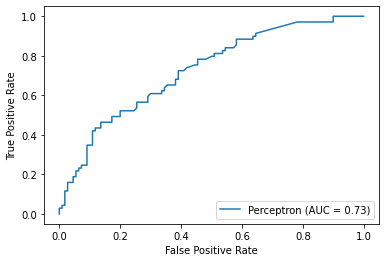

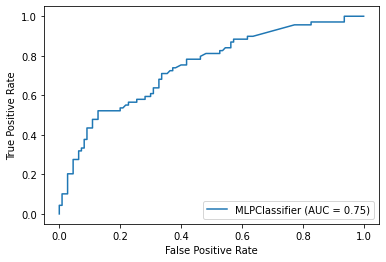

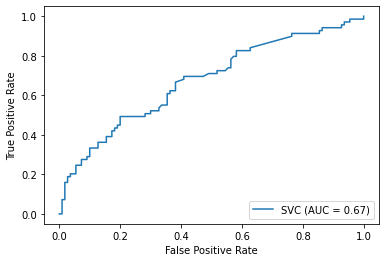

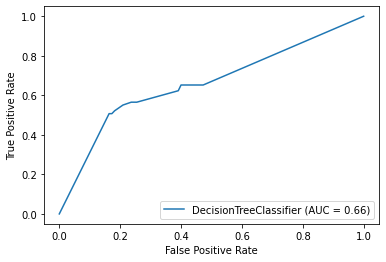

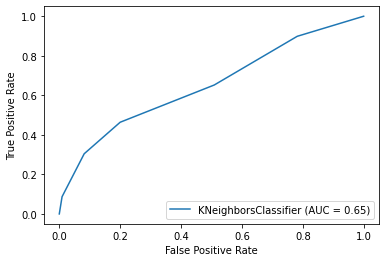

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

#separando o conjunto de dados de maneira estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)


clf1 = Perceptron()
clf2 = MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000)
clf3 = SVC(kernel='poly', degree=3, gamma='scale')
clf4 = DecisionTreeClassifier(criterion='gini')
clf5 = KNeighborsClassifier(n_neighbors=5)

#treinando os classificadores
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)

metrics.plot_roc_curve(clf1, X_test, y_test)  #PERC
metrics.plot_roc_curve(clf2, X_test, y_test)  #MLP
metrics.plot_roc_curve(clf3, X_test, y_test)  #SVC
metrics.plot_roc_curve(clf4, X_test, y_test)  #KNN
metrics.plot_roc_curve(clf5, X_test, y_test)  #CART'''
plt.show()



---

### Questão 05.

Agora utilize a função `plot_roc` definida abaixo para o modelo com maior e menor acurácia (de acordo como você calculou na questão 02). Essa função irá calcular a curva ROC utilizando 10-fold cross-validation, exibindo a curva média bem como as curvas para cada fold. Comente se agora o resultado foi conforme o esperado.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

def plot_roc(classifier, X, y):
  cv = StratifiedKFold(n_splits=10)  

  if isinstance(X, pd.core.frame.DataFrame):
    X = X.values
  if isinstance(y, pd.core.frame.DataFrame) or isinstance(y, pd.core.series.Series):
    y = y.values

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots()
  for i, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = plot_roc_curve(classifier, X[test], y[test],
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)  

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example")
  ax.legend(loc="lower right")
  plt.show()

In [ ]:
PERclassifier = Perceptron()
PERclassifier.fit(X_train, Y_train)
predictions = PERclassifier.predict(X_validation)

MLPclassifier = MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000)
MLPclassifier.fit(X_train, Y_train)
predictions = MLPclassifier.predict(X_validation)

SVMclassifier = SVC(kernel='poly', degree=3, gamma='scale')
SVMclassifier.fit(X_train, Y_train)
predictions = SVMclassifier.predict(X_validation)

CARTclassifier = DecisionTreeClassifier(criterion='gini')
CARTclassifier.fit(X_train, Y_train)
predictions = CARTclassifier.predict(X_validation)

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, Y_train)
predictions = KNNclassifier.predict(X_validation)



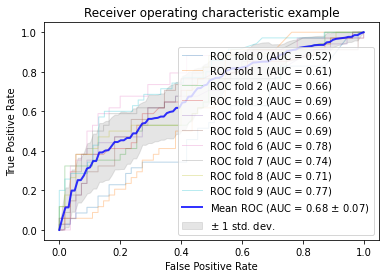

In [ ]:
#Classificador com menor acurácia
plot_roc(SVMclassifier, X, y)

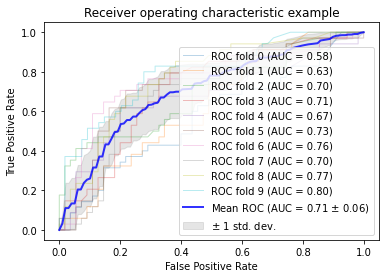

In [ ]:
#classificador com maior acurácia
plot_roc(MLPclassifier, X, y)

In [ ]:
#Os resultados foram conforme o esperado



---

### Questão bônus:

Para essa questão você deve testar o seu algoritmo em um conjunto de dados nunca visto através do site [Kaggle](https://www.kaggle.com/c/titanic/overview). A ideia é prever as classes dos dados do arquivo `questao_extra.csv` e submeter o resultado no Kaggle, para que o mesmo faça a avaliação.

O arquivo que você deverá submeter no site deverá conter apenas a coluna "PassegerID" e "Survived" (há um arquivo de submissão de exemplo na pasta do exercício). Na figura abaixo podemos ver a distribuição de performance dos participantes dessa competição.

Note que nessa questão você deve treinar o seu classificador com todos os dados disponíveis (ou seja, todos os dados do arquivo `titanic.csv`).

**Reporte o seu resultado aqui para eu saber o quão bem vocês foram!**

*   Dica: Você pode gerar um arquivo csv a partir de um `DataFrame` com a função `pandas.DataFrame.to_csv`. Lembre-se de passar `index=False`

![alt text](http://playagricola.com/Kaggle/first.png)







In [311]:
#ler o csv completo novamente
df_kaggle = pd.read_csv('titanic.csv')

print(df_kaggle.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [317]:
#normalização
df_kaggle.Cabin.fillna(0, inplace=True)
df_kaggle['Age'] = df['Age'].fillna(df['Age'].mean(0))
df_kaggle['Fare'] = df['Fare'].fillna(df['Fare'].mean(0))

df_kaggle['Embarked'] = df_kaggle['Embarked'].replace(to_replace = ['S'], value = [1])
df_kaggle['Embarked'] = df_kaggle['Embarked'].replace(to_replace = ['C'], value = [2])
df_kaggle['Embarked'] = df_kaggle['Embarked'].replace(to_replace = ['Q'], value = [3])
df_kaggle['Sex'] = df_kaggle['Sex'].replace(to_replace = ['male'], value = [0])
df_kaggle['Sex'] = df_kaggle['Sex'].replace(to_replace = ['female'], value = [1])

#checa se ainda há valores ausentes
df_kaggle.isnull().sum()




PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [318]:
#separando os dados (completos) em atributos e classe
Xi = df_kaggle.iloc[:, 2:-1]
Yi = df_kaggle['Survived']
#print('---------------------------(features)-------------------------------')
print(Xi)
#print('---------------------------(class)----------------------------------')
print(Yi)

     Pclass                                               Name  ...  Fare  Cabin
0         3                            Braund, Mr. Owen Harris  ...   8.0      0
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  ...  72.0    C85
2         3                             Heikkinen, Miss. Laina  ...   8.0      0
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  ...  54.0   C123
4         3                           Allen, Mr. William Henry  ...   9.0      0
..      ...                                                ...  ...   ...    ...
886       2                              Montvila, Rev. Juozas  ...  13.0      0
887       1                       Graham, Miss. Margaret Edith  ...  30.0    B42
888       3           Johnston, Miss. Catherine Helen "Carrie"  ...  24.0      0
889       1                              Behr, Mr. Karl Howell  ...  30.0   C148
890       3                                Dooley, Mr. Patrick  ...   8.0      0

[891 rows x 9 columns]
0   

In [319]:
#Retorna apenas a primeira letra do nome
for ida, i in enumerate(df_kaggle['Name']):
    df_kaggle['Name'].iloc[ida] = i[0]


#Retorna apenas a primeira letra do Fare
for ida, i in enumerate(df_kaggle['Ticket']):
    df_kaggle['Ticket'].iloc[ida] = i[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [320]:
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['A'], value = [0])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['B'], value = [1])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['C'], value = [2])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['D'], value = [3])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['d'], value = [3])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['E'], value = [4])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['F'], value = [5])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['G'], value = [6])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['H'], value = [7])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['I'], value = [8])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['J'], value = [9])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['K'], value = [10])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['L'], value = [11])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['M'], value = [12])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['N'], value = [13])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['O'], value = [14])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['P'], value = [15])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['Q'], value = [16])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['R'], value = [17])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['S'], value = [18])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['T'], value = [19])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['U'], value = [20])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['V'], value = [21])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['v'], value = [21])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['X'], value = [22])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['Y'], value = [23])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['Z'], value = [24])
df_kaggle['Name'] = df_kaggle['Name'].replace(to_replace = ['W'], value = [25])

In [321]:
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['A'], value = [0])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['B'], value = [1])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['C'], value = [2])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['D'], value = [3])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['d'], value = [3])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['E'], value = [4])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['F'], value = [5])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['G'], value = [6])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['H'], value = [7])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['I'], value = [8])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['J'], value = [9])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['K'], value = [10])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['L'], value = [11])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['M'], value = [12])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['N'], value = [13])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['O'], value = [14])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['P'], value = [15])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['Q'], value = [16])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['R'], value = [17])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['S'], value = [18])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['T'], value = [19])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['U'], value = [20])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['V'], value = [21])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['v'], value = [21])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['X'], value = [22])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['Y'], value = [23])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['Z'], value = [24])
df_kaggle['Ticket'] = df_kaggle['Ticket'].replace(to_replace = ['W'], value = [25])

In [345]:
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A11'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A18'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A21'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A29'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A34'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A9'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B10'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B11'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B24'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B26'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B36'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B41'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B45'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B52'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B52 B54 B56'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B56'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B51 B53 B55'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B57 B59 B63 B66'], value = [3])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B58 B60'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B61'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B69'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B71'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B78'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C101'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C105'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C106'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C116'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C130'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C132'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C22 C26'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C23 C25 C27'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C28'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C31'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C32'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C39'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C46'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C51'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C53'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C54'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C55 C57'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C6'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C62 C64'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C7'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C78'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C80'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C85'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C86'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C89'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C97'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D10 D12'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D15'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D19'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D21'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D22'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D28'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D30'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D34'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D37'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D38'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D40'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D43'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E31'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E34'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E39 E41'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E45'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E46'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E50'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E52'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E60'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F E46'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F E57'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F G63'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F2'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F33'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F4'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['G6'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C123'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C103'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D56'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A6'], value = [1])

df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B28'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C83'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F G73'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A5'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D26'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C110'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E101'], value = [3])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D33'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B30'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C52'], value = [2])

df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['F E69'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D47'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B86'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C2'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E33'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B19'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A7'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C49'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A32'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B4'], value = [1])

df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B80'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A31'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D36'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C93'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D35'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C87'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B77'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E67'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B94'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C125'], value = [2])


df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C99'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C118'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['D7'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['A19'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B49'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B18'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C65'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['E67'], value = [2])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['B94'], value = [1])
df_kaggle['Cabin'] = df_kaggle['Cabin'].replace(to_replace = ['C125'], value = [2])



In [346]:
print(df_kaggle['Cabin'].values)

[0 1 0 2 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 2 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 0 0 0 0 0 2 2 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 1 1 0 0 0 0 2 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 3 2 0 0 0 1 0 0 0 0 0 0 0 1 2 0 1 0 0 0 0 0 0 0 0
 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 2 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 0 1 0 0 0
 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 1 1 0 0 0 0 2 0
 0 0 0 2 1 0 0 0 0 2 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0
 0 1 1 1 0 0 0 3 0 1 0 2 0 1 1 3 0 0 0 0 0 0 2 2 0 0 0 0 0 1 0 1 0 2 0
 'C124' 'C91' 0 0 0 2 'E40' 0 'T' 1 2 0 0 0 1 0 0 0 0 0 'C128' 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 1 0 0 'B35' 1 0 0 0 0 0 0 'C82' 0 0 0 0 0 0 0 0 0 0 0 0
 'B96 B98' 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 'E10' 2 0 0 0 'E44' 'B96 B98' 0 0 2 0 0 0 0 0 0 2 0 0 0
 'C104' 0 0 'C111' 'C92' 0 0 'E38' 1 

In [ ]:
#Treinando os classificadores e apresentando a acurácia
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

PERclassifier = Perceptron()
PERclassifier.fit(X_train, Y_train)
predictions0 = PERclassifier.predict(X_validation)
print("Accuracy PER: %.2f" % accuracy_score(Y_validation, predictions0))

MLPclassifier = MLPClassifier(random_state=1, hidden_layer_sizes=(15,), max_iter=2000)
MLPclassifier.fit(X_train, Y_train)
predictions1 = MLPclassifier.predict(X_validation)
print("Accuracy MLP: %.2f" % accuracy_score(Y_validation, predictions1))

SVMclassifier = SVC(kernel='poly', degree=3, gamma='scale')
SVMclassifier.fit(X_train, Y_train)
predictions2 = SVMclassifier.predict(X_validation)
print("Accuracy SVM: %.2f" % accuracy_score(Y_validation, predictions2))

CARTclassifier = DecisionTreeClassifier(criterion='gini')
CARTclassifier.fit(X_train, Y_train)
predictions3 = CARTclassifier.predict(X_validation)
print("Accuracy CART: %.2f" % accuracy_score(Y_validation, predictions3))

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, Y_train)
predictions4 = KNNclassifier.predict(X_validation)
print("Accuracy KNN: %.2f" % accuracy_score(Y_validation, predictions4))

Accuracy PER: 0.78
Accuracy MLP: 0.71
Accuracy SVM: 0.70
Accuracy CART: 0.72
Accuracy KNN: 0.70


In [300]:
#lendo o dataset questao_extra
df_test = pd.read_csv('questao_extra.csv')
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Kelly,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Wilkes,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Myles,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Wirz,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Hirvonen,female,22.0,1,1,3101298,12.2875,NaN,S


In [301]:
#normalização
df_test.Cabin.fillna(0, inplace=True)
df_test['Age'] = df['Age'].fillna(df['Age'].mean(0))
df_test['Fare'] = df['Fare'].fillna(df['Fare'].mean(0))
df_test['Embarked'] = df_test['Embarked'].replace(to_replace = ['S'], value = [1])
df_test['Embarked'] = df_test['Embarked'].replace(to_replace = ['C'], value = [2])
df_test['Embarked'] = df_test['Embarked'].replace(to_replace = ['Q'], value = [3])
df_test['Sex'] = df_test['Sex'].replace(to_replace = ['male'], value = [0])
df_test['Sex'] = df_test['Sex'].replace(to_replace = ['female'], value = [1])


In [302]:
#normalização "Name" e "Ticket"

#Retorna apenas a primeira letra do nome
for ida, i in enumerate(df_test['Name']):
    df_test['Name'].iloc[ida] = i[0]


#Retorna apenas a primeira letra do Fare
for ida, i in enumerate(df_test['Ticket']):
    df_test['Ticket'].iloc[ida] = i[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [303]:
df_test['Name'] = df_test['Name'].replace(to_replace = ['A'], value = [0])
df_test['Name'] = df_test['Name'].replace(to_replace = ['B'], value = [1])
df_test['Name'] = df_test['Name'].replace(to_replace = ['C'], value = [2])
df_test['Name'] = df_test['Name'].replace(to_replace = ['D'], value = [3])
df_test['Name'] = df_test['Name'].replace(to_replace = ['d'], value = [3])
df_test['Name'] = df_test['Name'].replace(to_replace = ['E'], value = [4])
df_test['Name'] = df_test['Name'].replace(to_replace = ['F'], value = [5])
df_test['Name'] = df_test['Name'].replace(to_replace = ['G'], value = [6])
df_test['Name'] = df_test['Name'].replace(to_replace = ['H'], value = [7])
df_test['Name'] = df_test['Name'].replace(to_replace = ['I'], value = [8])
df_test['Name'] = df_test['Name'].replace(to_replace = ['J'], value = [9])
df_test['Name'] = df_test['Name'].replace(to_replace = ['K'], value = [10])
df_test['Name'] = df_test['Name'].replace(to_replace = ['L'], value = [11])
df_test['Name'] = df_test['Name'].replace(to_replace = ['M'], value = [12])
df_test['Name'] = df_test['Name'].replace(to_replace = ['N'], value = [13])
df_test['Name'] = df_test['Name'].replace(to_replace = ['O'], value = [14])
df_test['Name'] = df_test['Name'].replace(to_replace = ['P'], value = [15])
df_test['Name'] = df_test['Name'].replace(to_replace = ['Q'], value = [16])
df_test['Name'] = df_test['Name'].replace(to_replace = ['R'], value = [17])
df_test['Name'] = df_test['Name'].replace(to_replace = ['S'], value = [18])
df_test['Name'] = df_test['Name'].replace(to_replace = ['T'], value = [19])
df_test['Name'] = df_test['Name'].replace(to_replace = ['U'], value = [20])
df_test['Name'] = df_test['Name'].replace(to_replace = ['V'], value = [21])
df_test['Name'] = df_test['Name'].replace(to_replace = ['v'], value = [21])
df_test['Name'] = df_test['Name'].replace(to_replace = ['X'], value = [22])
df_test['Name'] = df_test['Name'].replace(to_replace = ['Y'], value = [23])
df_test['Name'] = df_test['Name'].replace(to_replace = ['Z'], value = [24])
df_test['Name'] = df_test['Name'].replace(to_replace = ['W'], value = [25])




In [304]:
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['A'], value = [0])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['B'], value = [1])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['C'], value = [2])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['D'], value = [3])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['d'], value = [3])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['E'], value = [4])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['F'], value = [5])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['G'], value = [6])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['H'], value = [7])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['I'], value = [8])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['J'], value = [9])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['K'], value = [10])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['L'], value = [11])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['M'], value = [12])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['N'], value = [13])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['O'], value = [14])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['P'], value = [15])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['Q'], value = [16])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['R'], value = [17])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['S'], value = [18])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['T'], value = [19])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['U'], value = [20])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['V'], value = [21])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['v'], value = [21])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['X'], value = [22])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['Y'], value = [23])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['Z'], value = [24])
df_test['Ticket'] = df_test['Ticket'].replace(to_replace = ['W'], value = [25])

In [305]:
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['A11'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['A18'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['A21'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['A29'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['A34'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['A9'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B10'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B11'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B24'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B26'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B36'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B41'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B45'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B52'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B52 B54 B56'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B56'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B51 B53 B55'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B57 B59 B63 B66'], value = [3])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B58 B60'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B61'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B69'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B71'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['B78'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C101'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C105'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C106'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C116'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C130'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C132'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C22 C26'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C23 C25 C27'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C28'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C31'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C32'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C39'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C46'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C51'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C53'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C54'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C55 C57'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C6'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C62 C64'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C7'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C78'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C80'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C85'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C86'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C89'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['C97'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D10 D12'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D15'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D19'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D21'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D22'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D28'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D30'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D34'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D37'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D38'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D40'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['D43'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['E31'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['E34'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['E39 E41'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['E45'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['E46'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['E50'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['E52'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['E60'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['F'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['F E46'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['F E57'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['F G63'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['F2'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['F33'], value = [1])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['F4'], value = [2])
df_test['Cabin'] = df_test['Cabin'].replace(to_replace = ['G6'], value = [1])



In [308]:
df_final = df_test.iloc[:, 1:-1]
df_final.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,3,10,0,22.0,0,0,3,8.0,0
1,3,25,1,38.0,1,0,3,72.0,0
2,2,12,0,26.0,0,0,2,8.0,0
3,3,25,0,35.0,0,0,3,54.0,0
4,3,7,1,35.0,1,1,3,9.0,0


In [309]:
df_predited = PERclassifier.predict(df_final)
for add, i in enumerate(df_predited):
	print(add, i)

ValueError: ignored